In [1]:
from impdar.lib import load, gpslib

In [2]:
radar_lines = load.load('bsi', 'jif2021.h5')

Loading line_0 from jif2021.h5
Interpolating traces with bad GPS in line_0
Loading line_1 from jif2021.h5
Interpolating traces with bad GPS in line_1


## Take a look at what we have
Sometimes, before we even look at what the radar data are, we need to figure out where on earth they are from. In this case, I saw that it was in Alaska so chose an Alaska Albers projection. You can always start with PlateCarree/Mercator

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

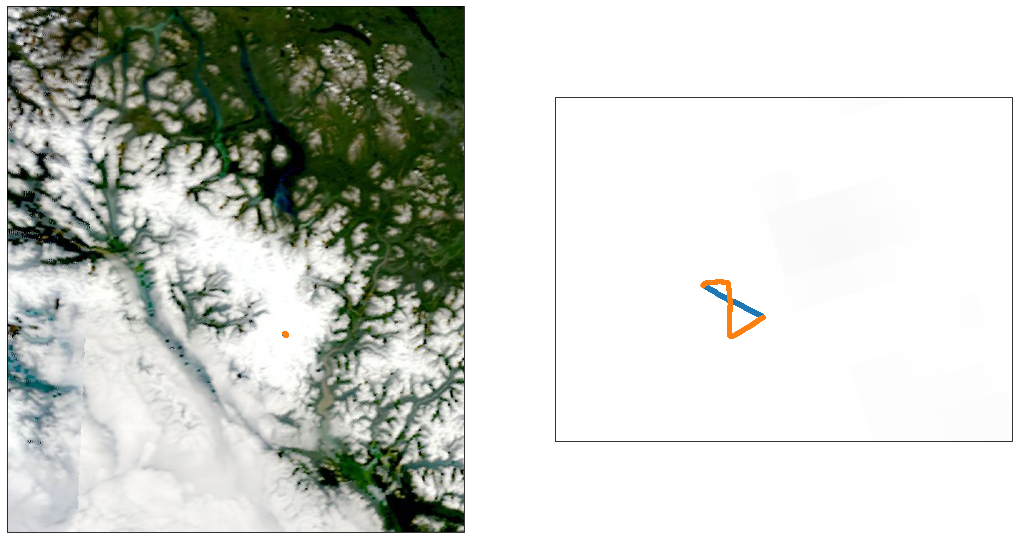

In [4]:
# This cell will require cartopy and owslib, both can be installed with pip
import cartopy.crs as ccrs
from owslib.wmts import WebMapTileService

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # we get some annoying stuff from owslib here otherwise
    # URL of NASA GIBS
    url = 'https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
    wmts = WebMapTileService(url)
    # Layers for MODIS true color and snow RGB
    layer = 'MODIS_Terra_SurfaceReflectance_Bands143'
    date_str = '2021-07-04'

    # Extents near JI
    rough_extents = [-136, -133, 58, 60]
    fine_extents = [-134.25, -134.15, 58.64, 58.67]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 12), subplot_kw={'projection': ccrs.epsg(3338)})
    ax1.set_extent(rough_extents, crs=ccrs.PlateCarree())
    ax2.set_extent(fine_extents, crs=ccrs.PlateCarree())
    for ax in (ax1, ax2):
        ax.add_wmts(wmts, layer, wmts_kwargs={'time': date_str})
        for line in radar_lines:
            ax.plot(line.long, line.lat, linestyle='none', marker='.', transform=ccrs.PlateCarree())

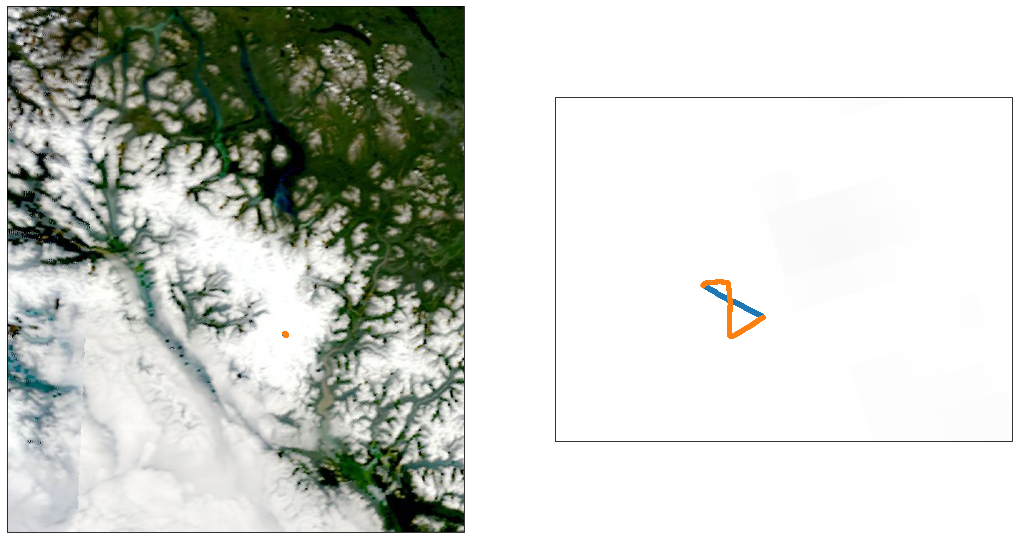

In [5]:
# We can also use some geographic builtins with ImpDAR (GDAL required here)
if gpslib.conversions_enabled:
    for line in radar_lines:
        line.get_projected_coords(t_srs='EPSG:3338')
    
    # Now plot the projected version
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 12), subplot_kw={'projection': ccrs.epsg(3338)})
    ax1.set_extent(rough_extents, crs=ccrs.PlateCarree())
    ax2.set_extent(fine_extents, crs=ccrs.PlateCarree())
    for ax in (ax1, ax2):
        ax.add_wmts(wmts, layer, wmts_kwargs={'time': date_str})
        for line in radar_lines:
            ax.plot(line.x_coord, line.y_coord, linestyle='none', marker='.')